# Thresholding

## 01. Load and Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2, sys

# Manually specify the path to the project directory
project_path = '../../'

# Add the project directory to sys.path
sys.path.append(project_path)

from mansoor import Repeatable

### Create Instance of Class

In [28]:
r = Repeatable(300,300, base_path='../../data/images/', video_path='../../data/video/') # It have functions that we need to do Repeatedly

## 02. Simple Thresholding

### Load an Image

In [3]:
img = r.load_image('IMG_7582-768x1024.jpg')

### Thresh Binary

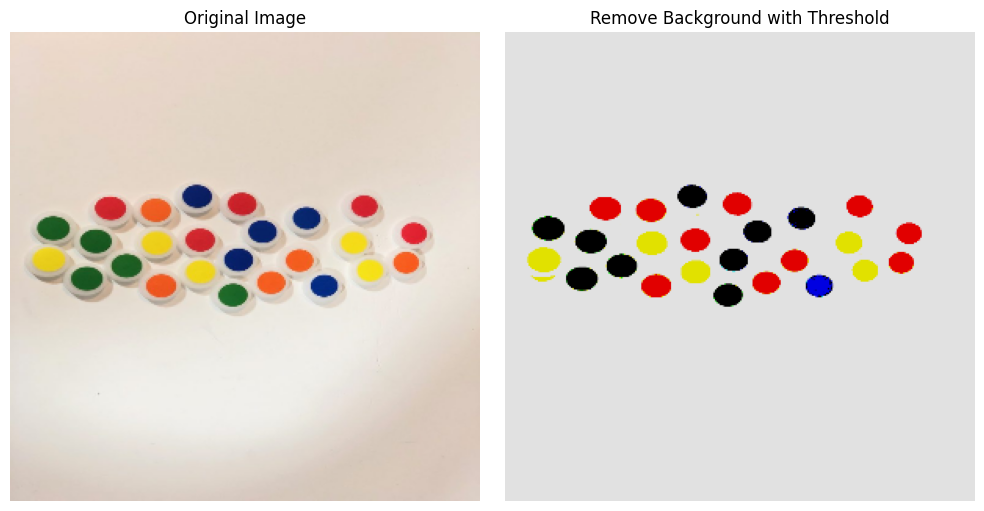

In [4]:
_, th = cv2.threshold(src=img, thresh=120, maxval=225, type=cv2.THRESH_BINARY)
r.show_multiple_images((img, th), titles=("Original Image", "Remove Background with Threshold"))

#### Let's try it on different Images

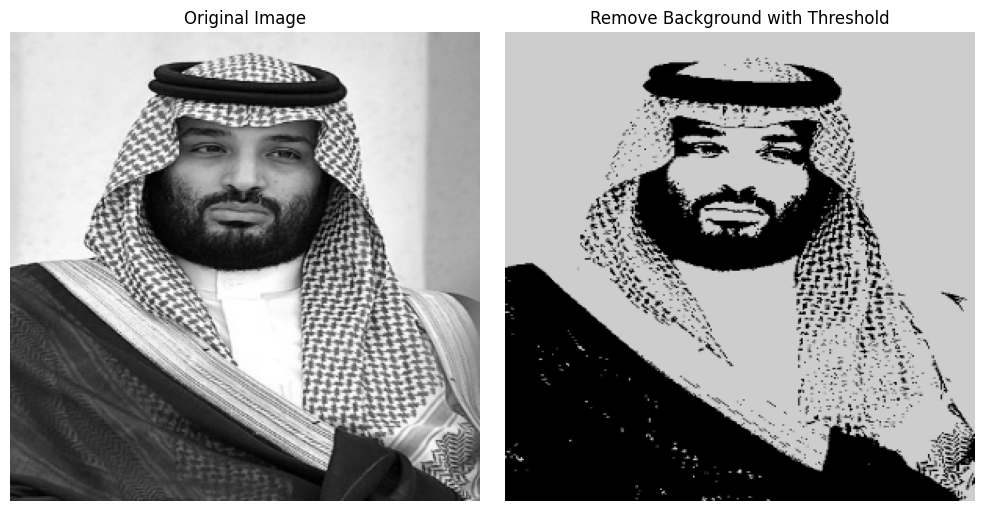

In [5]:
img = r.load_image()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(src=img, thresh=90, maxval=205, type=cv2.THRESH_BINARY)
r.show_multiple_images((img, th), titles=("Original Image", "Remove Background with Threshold"))

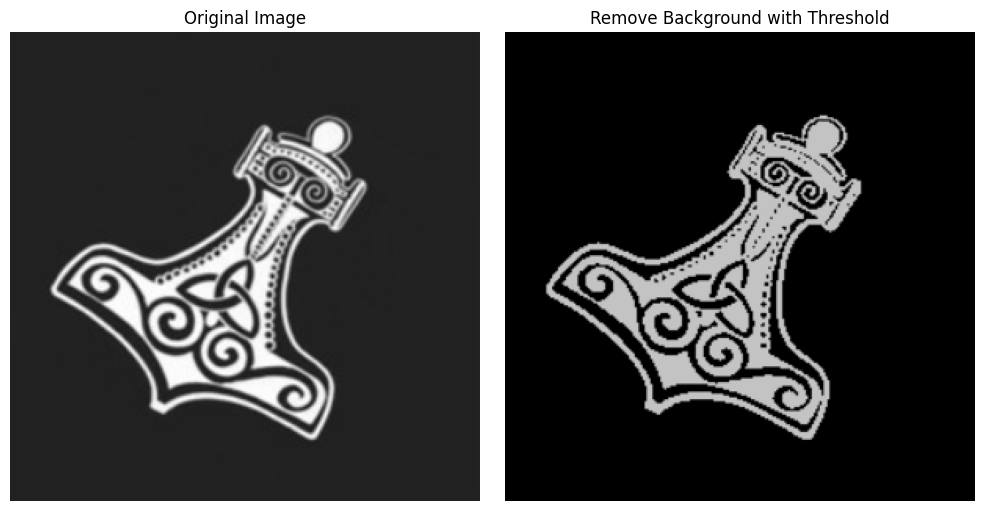

In [6]:
img = r.load_image('Picture1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(src=img, thresh=90, maxval=195, type=cv2.THRESH_BINARY)
r.show_multiple_images((img, th), titles=("Original Image", "Remove Background with Threshold"))

## 03. OTSU Threshold

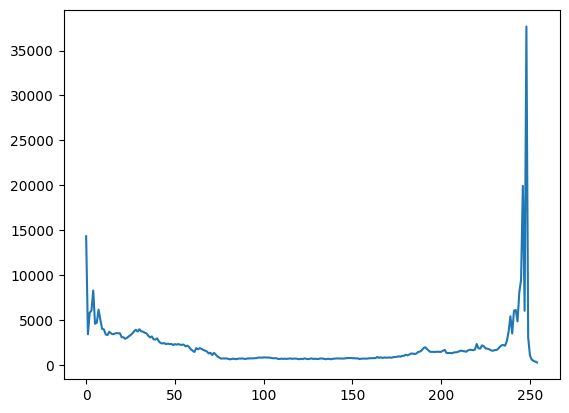

In [7]:
img = r.load_image('1.jpg', 0)
# Plot Hist of It, Because we only apply threshold if we have two vallys in hist
hist = cv2.calcHist(images=[img], channels=[0], mask=None, histSize=[255], ranges=(0,255))
plt.plot(hist)

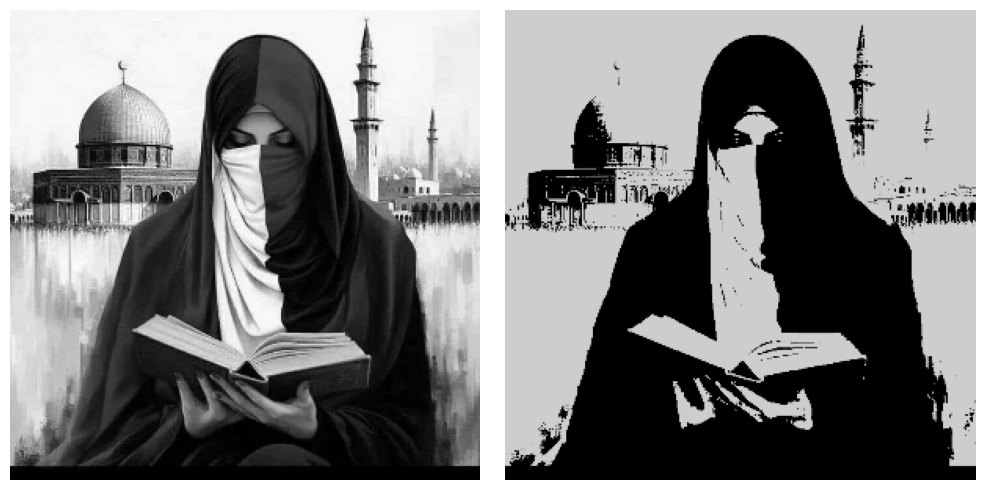

In [8]:
# Apply otsu
_, thre = cv2.threshold(src=img, thresh=90, maxval=205, type=cv2.THRESH_BINARY - cv2.THRESH_OTSU)
r.show_multiple_images((img, thre))

## 04. THRESH_TOZERO

In [9]:
img = r.load_image('img5.jpg')

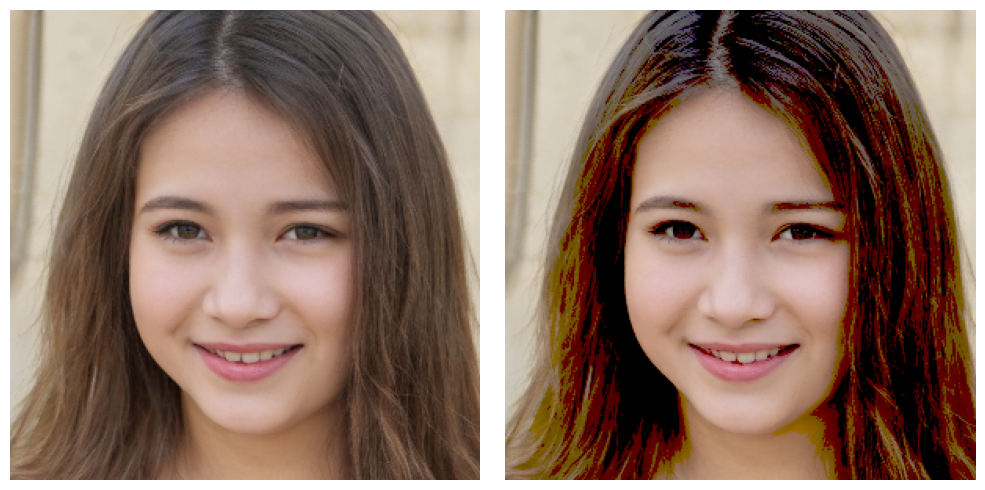

In [10]:
_, thre = cv2.threshold(src=img, thresh=75, maxval=255, type= cv2.THRESH_TOZERO)
r.show_multiple_images((img, thre))

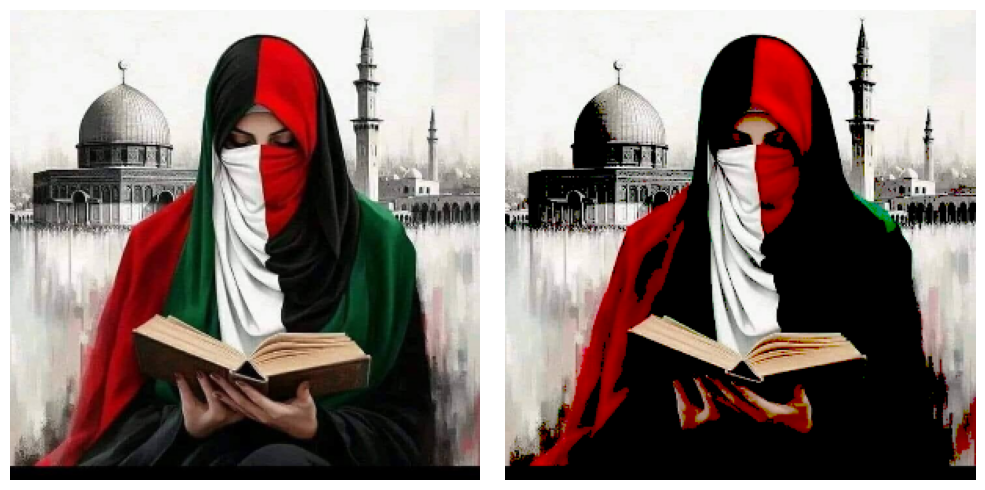

In [11]:
img = r.load_image('1.jpg')
_, thre = cv2.threshold(src=img, thresh=100, maxval=255, type= cv2.THRESH_TOZERO)
r.show_multiple_images((img, thre))

## 05. Histogram of An Image

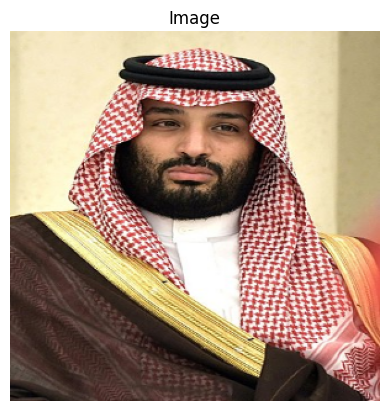

In [12]:
img = r.load_image()
r.show_image_with_color(img)

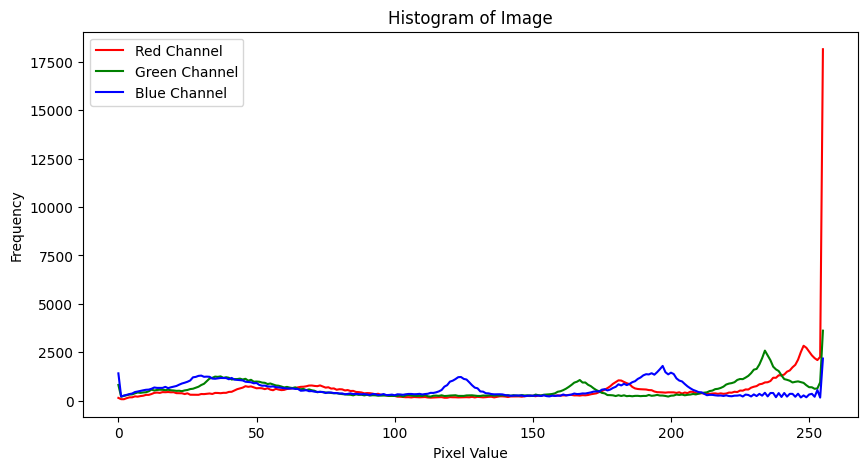

In [16]:
# Convert from BGR (OpenCV default) to RGB for better visualization with matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Calculate the histogram for each channel
hist_r = cv2.calcHist([img], [0], None, [256], [0, 256])  # Red channel
hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])  # Green channel
hist_b = cv2.calcHist([img], [2], None, [256], [0, 256])  # Blue channel

# Plot the histograms for each channel
plt.figure(figsize=(10, 5))

# Plot for Red channel
plt.plot(hist_r, color='red', label='Red Channel')
# Plot for Green channel
plt.plot(hist_g, color='green', label='Green Channel')
# Plot for Blue channel
plt.plot(hist_b, color='blue', label='Blue Channel')

plt.title("Histogram of Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

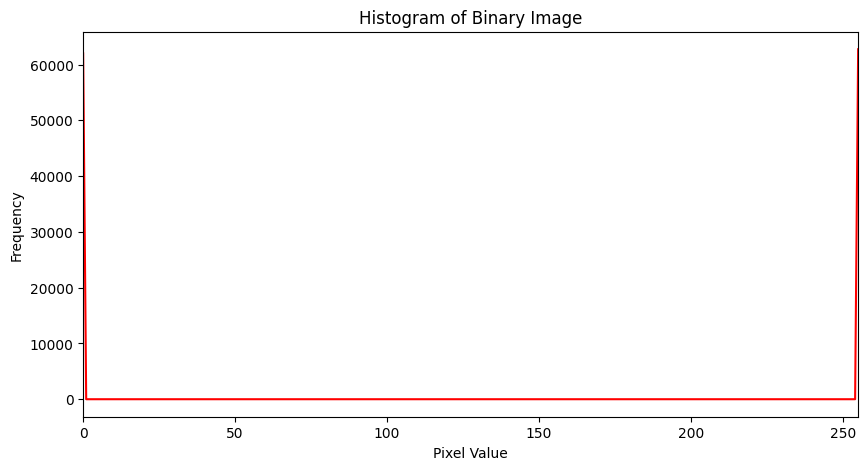

In [22]:

img = r.load_image('1bit1.png')
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
# Plot the histogram
plt.figure(figsize=(10, 5))
plt.plot(hist, color='red')  # Only one color (red), since it's a binary image
plt.title("Histogram of Binary Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 255])  # To ensure the x-axis covers the full range (0 to 255)
plt.show()

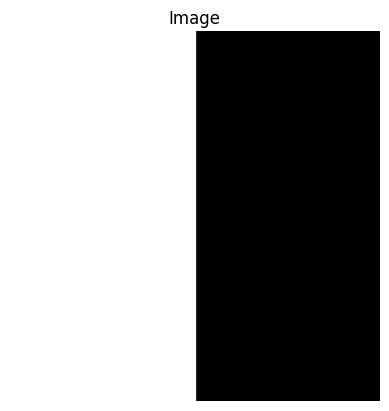

In [18]:
r.show_image_with_color(img)

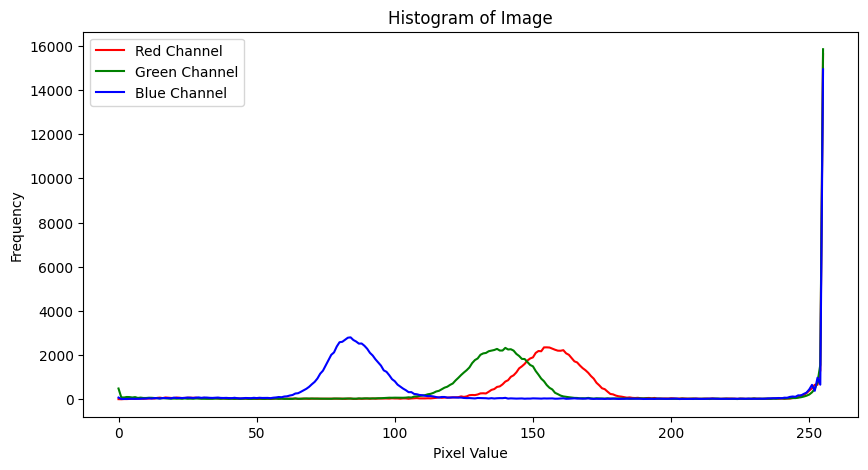

In [23]:
img = r.load_image('colonies-02.jpg')
# Convert from BGR (OpenCV default) to RGB for better visualization with matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Calculate the histogram for each channel
hist_r = cv2.calcHist([img], [0], None, [256], [0, 256])  # Red channel
hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])  # Green channel
hist_b = cv2.calcHist([img], [2], None, [256], [0, 256])  # Blue channel

# Plot the histograms for each channel
plt.figure(figsize=(10, 5))

# Plot for Red channel
plt.plot(hist_r, color='red', label='Red Channel')
# Plot for Green channel
plt.plot(hist_g, color='green', label='Green Channel')
# Plot for Blue channel
plt.plot(hist_b, color='blue', label='Blue Channel')

plt.title("Histogram of Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

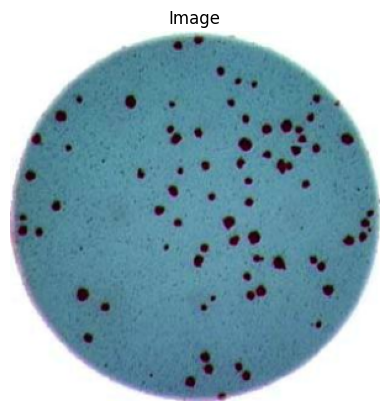

In [24]:
r.show_image_with_color(img)

### Split Color

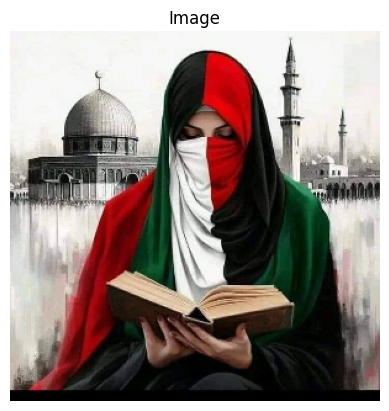

In [25]:
img = r.load_image('1.jpg')
r.show_image_with_color(img)

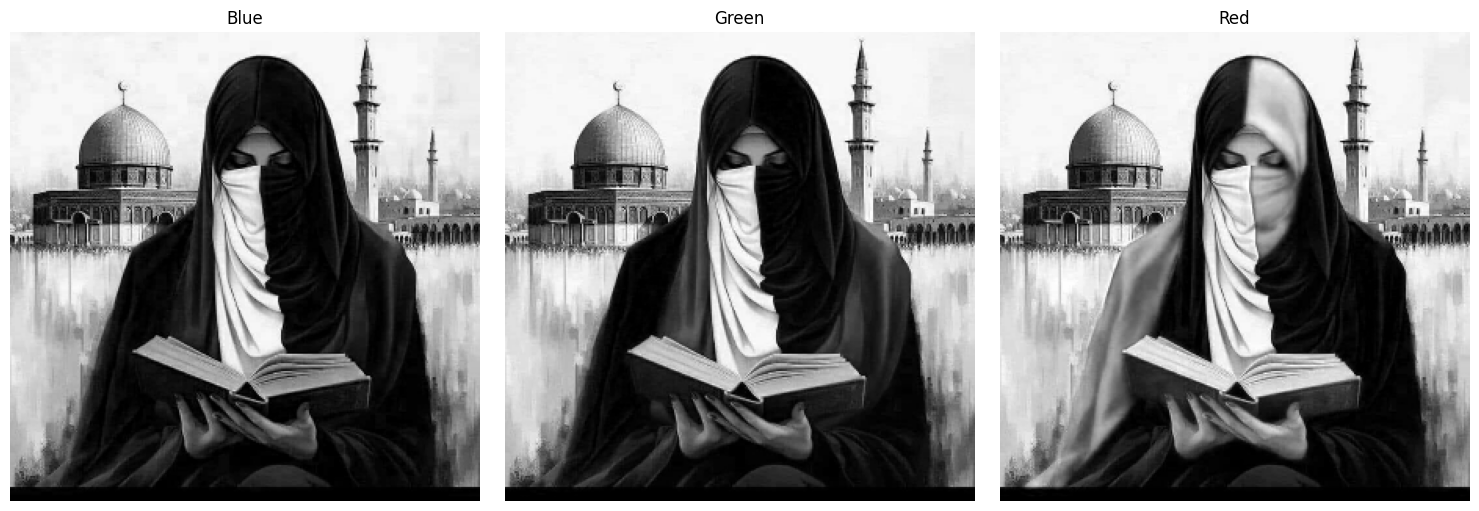

In [43]:
b,g,red_i = cv2.split(img)
r.show_multiple_images((b,g,red_i), titles=("Blue", "Green", "Red"))

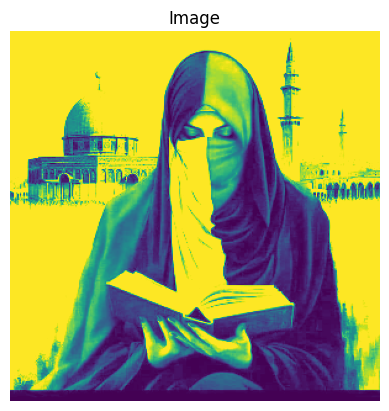

In [31]:
b_r = cv2.addWeighted(b,1,red_i,1,2)
r.showImage(b_r)

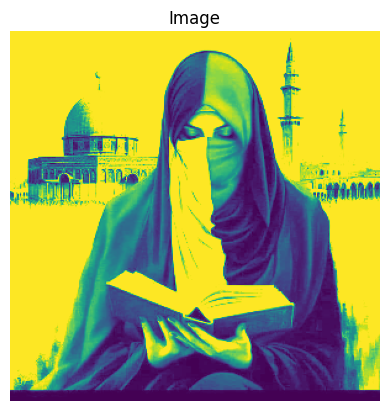

In [32]:
g_r = cv2.addWeighted(g,1,red_i,1,2)
r.showImage(g_r)

### Plot Histogram of Each

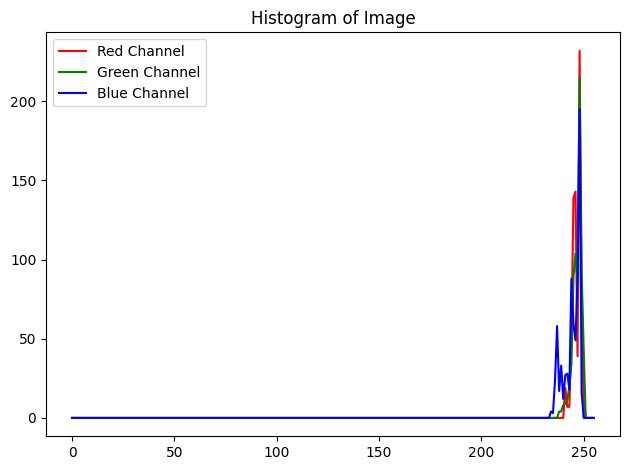

In [46]:
red = cv2.calcHist((red_i), [0], None, [256], [0,255])
green = cv2.calcHist((g), [0], None, [256], [0,255])
blue = cv2.calcHist((b), [0], None, [256], [0,255])

plt.plot(red ,color='red', label='Red Channel')
plt.plot(green, color='green', label='Green Channel')
plt.plot(blue, color='blue', label='Blue Channel')
plt.title("Histogram of Image")
plt.legend()
plt.tight_layout()
plt.show()

## Histogram Equilization In OpenCV